In [181]:
!ln -s /content/drive/MyDrive/FMT/relatorio_3 ./fmt

ln: failed to create symbolic link './fmt/relatorio_3': File exists


In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [183]:
df = pd.read_csv("/content/fmt/lei_de_hooke_dados1.csv")

In [184]:
df

,Número da medida,F [N],D [m],Média F [N],Média D [m],δ Dinamômetro,δ Régua,σm F,σm D,Expressão da Medida (D [m]),Expressão da Medida (F [N]),k_1,w_1
0,Peso 5 e 1,"0,80","0,0880","0,85","0,0918","0,01","0,0005","0,10","0,0106","0,088 ± 0,011","0,8 ± 0,10",NaN,NaN
1,Peso 2 e 4,"0,80","0,0880",NaN,NaN,NaN,NaN,NaN,NaN,"0,088 ± 0,011","0,8 ± 0,10",NaN,NaN
2,Peso 3 e 1,"1,08","0,1150",NaN,NaN,NaN,NaN,NaN,NaN,"0,115 ± 0,011","1,08 ± 0,10",NaN,NaN
3,Peso 4 e 5,"0,54","0,0560",NaN,NaN,NaN,NaN,NaN,NaN,"0,056 ± 0,011","0,54 ± 0,10",NaN,NaN
4,"Peso 2, 4 e 5","1,02","0,1120",NaN,NaN,NaN,NaN,NaN,NaN,"0,112 ± 0,011","1,02 ± 0,10",NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Número da medida,FN,dm,Média F [N],Média D [m],δ Dinamômetro,δ Régua,σm F,σm D,Expressão da Medida (D [m]),Expressão da Medida (F [N]),k_3,w_3
7,Peso 5 e 1,NaN,"0,0180",#DIV/0!,"0,0188","0,01","0,0005",#DIV/0!,"0,0022",NaN,NaN,NaN,NaN
8,Peso 2 e 4,NaN,"0,0170",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Peso 3 e 1,NaN,"0,0230",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Organização dos dados

In [185]:
df = df.replace(',', '.', regex = True)

In [186]:
df

,Número da medida,F [N],D [m],Média F [N],Média D [m],δ Dinamômetro,δ Régua,σm F,σm D,Expressão da Medida (D [m]),Expressão da Medida (F [N]),k_1,w_1
0,Peso 5 e 1,0.80,0.0880,0.85,0.0918,0.01,0.0005,0.10,0.0106,0.088 ± 0.011,0.8 ± 0.10,NaN,NaN
1,Peso 2 e 4,0.80,0.0880,NaN,NaN,NaN,NaN,NaN,NaN,0.088 ± 0.011,0.8 ± 0.10,NaN,NaN
2,Peso 3 e 1,1.08,0.1150,NaN,NaN,NaN,NaN,NaN,NaN,0.115 ± 0.011,1.08 ± 0.10,NaN,NaN
3,Peso 4 e 5,0.54,0.0560,NaN,NaN,NaN,NaN,NaN,NaN,0.056 ± 0.011,0.54 ± 0.10,NaN,NaN
4,Peso 2. 4 e 5,1.02,0.1120,NaN,NaN,NaN,NaN,NaN,NaN,0.112 ± 0.011,1.02 ± 0.10,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Número da medida,FN,dm,Média F [N],Média D [m],δ Dinamômetro,δ Régua,σm F,σm D,Expressão da Medida (D [m]),Expressão da Medida (F [N]),k_3,w_3
7,Peso 5 e 1,NaN,0.0180,#DIV/0!,0.0188,0.01,0.0005,#DIV/0!,0.0022,NaN,NaN,NaN,NaN
8,Peso 2 e 4,NaN,0.0170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Peso 3 e 1,NaN,0.0230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df1 = df.loc[0:4, :].copy().reset_index()

df1[["F [N]", "D [m]", "δ Dinamômetro", "δ Régua", "σm F", "σm D"]] = df1[["F [N]", "D [m]", "δ Dinamômetro", "δ Régua", "σm F", "σm D"]].astype("float")

df1["F_mais_erro"] = df1["F [N]"] + df1["σm F"][0]
df1["F_menos_erro"] = df1["F [N]"] - df1["σm F"][0]


df1["D_mais_erro"] = df1["D [m]"] + df1["σm D"][0]
df1["D_menos_erro"] = df1["D [m]"] - df1["σm D"][0]

df1

,index,Número da medida,F [N],D [m],Média F [N],Média D [m],δ Dinamômetro,δ Régua,σm F,σm D,Expressão da Medida (D [m]),Expressão da Medida (F [N]),k_1,w_1,F_mais_erro,F_menos_erro,D_mais_erro,D_menos_erro
0,0,Peso 5 e 1,0.80,0.088,0.85,0.0918,0.01,0.0005,0.1,0.0106,0.088 ± 0.011,0.8 ± 0.10,NaN,NaN,0.90,0.70,0.0986,0.0774
1,1,Peso 2 e 4,0.80,0.088,NaN,NaN,NaN,NaN,NaN,NaN,0.088 ± 0.011,0.8 ± 0.10,NaN,NaN,0.90,0.70,0.0986,0.0774
2,2,Peso 3 e 1,1.08,0.115,NaN,NaN,NaN,NaN,NaN,NaN,0.115 ± 0.011,1.08 ± 0.10,NaN,NaN,1.18,0.98,0.1256,0.1044
3,3,Peso 4 e 5,0.54,0.056,NaN,NaN,NaN,NaN,NaN,NaN,0.056 ± 0.011,0.54 ± 0.10,NaN,NaN,0.64,0.44,0.0666,0.0454
4,4,Peso 2. 4 e 5,1.02,0.112,NaN,NaN,NaN,NaN,NaN,NaN,0.112 ± 0.011,1.02 ± 0.10,NaN,NaN,1.12,0.92,0.1226,0.1014


In [188]:
df2 = df.loc[7:11, :].copy().reset_index()

#df2[["F [N]", "D [m]", "δ Dinamômetro", "δ Régua", "σm F", "σm D"]] = df2[["F [N]", "D [m]", "δ Dinamômetro", "δ Régua", "σm F", "σm D"]].astype("float")

df2

,index,Número da medida,F [N],D [m],Média F [N],Média D [m],δ Dinamômetro,δ Régua,σm F,σm D,Expressão da Medida (D [m]),Expressão da Medida (F [N]),k_1,w_1
0,7,Peso 5 e 1,NaN,0.0180,#DIV/0!,0.0188,0.01,0.0005,#DIV/0!,0.0022,NaN,NaN,NaN,NaN
1,8,Peso 2 e 4,NaN,0.0170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,Peso 3 e 1,NaN,0.0230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Peso 4 e 5,NaN,0.0120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,Peso 2. 4 e 5,NaN,0.0240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
df3 = df.loc[14:18, :].copy().reset_index()

df3[["F [N]", "D [m]", "δ Dinamômetro", "δ Régua", "σm F", "σm D"]] = df3[["F [N]", "D [m]", "δ Dinamômetro", "δ Régua", "σm F", "σm D"]].astype("float")

df3

,index,Número da medida,F [N],D [m],Média F [N],Média D [m],δ Dinamômetro,δ Régua,σm F,σm D,Expressão da Medida (D [m]),Expressão da Medida (F [N]),k_1,w_1
0,14,Peso 5 e 1,0.84,0.136,0.95,0.1428,0.01,0.0005,0.06,0.0168,0.136 ± 0.0168,0.84 ± 0.06,NaN,NaN
1,15,Peso 2 e 4,0.84,0.136,NaN,NaN,NaN,NaN,NaN,NaN,0.136 ± 0.0168,0.84 ± 0.06,NaN,NaN
2,16,Peso 3 e 1,1.12,0.182,NaN,NaN,NaN,NaN,NaN,NaN,0.182 ± 0.0168,1.12 ± 0.06,NaN,NaN
3,17,Peso 4 e 5,0.88,0.087,NaN,NaN,NaN,NaN,NaN,NaN,0.087 ± 0.0168,0.88 ± 0.06,NaN,NaN
4,18,Peso 2. 4 e 5,1.06,0.173,NaN,NaN,NaN,NaN,NaN,NaN,0.173 ± 0.0168,1.06 ± 0.06,NaN,NaN


# Ajustes

## Ajuste para o experimento de uma mola

In [190]:
x1 = df1["D [m]"]
y1 = df1["F [N]"]

model1 = LinearRegression(fit_intercept = True)

model1.fit(x1[:, None], y1)

xfit1 = np.linspace(0.02, 0.14, 1000)
yfit1 = model1.predict(xfit[:, None])

<ipython-input-190-ad0c20872461>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model1.fit(x1[:, None], y1)


In [191]:
print(model1.coef_)

[8.97199575]


In [192]:
scores1 = cross_val_score(model1, x1[:, None], y1, cv = 2)
scores1.mean()

<ipython-input-192-601dc2ff429f>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores1 = cross_val_score(model1, x1[:, None], y1, cv = 2)


0.9588203032909179

## Ajuste para o experimento com duas molas em série

In [193]:
x3 = df3["D [m]"]
y3 = df3["F [N]"]

model3 = LinearRegression(fit_intercept = True)

model3.fit(x3[:, None], y3)

xfit3 = np.linspace(0.075, 0.2, 1000)
yfit3 = model3.predict(xfit3[:, None])

<ipython-input-193-7760ad1863c6>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model3.fit(x3[:, None], y3)


In [194]:
print(model3.coef_)

[2.72122798]


In [199]:
scores3 = cross_val_score(model3, x3[:, None], y3, cv = 2)
scores3.mean()

<ipython-input-199-ba7a5dcf126b>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores3 = cross_val_score(model3, x3[:, None], y3, cv = 2)


-2.937372949141431

#Gráficos

## Gráfico do experimento com uma mola

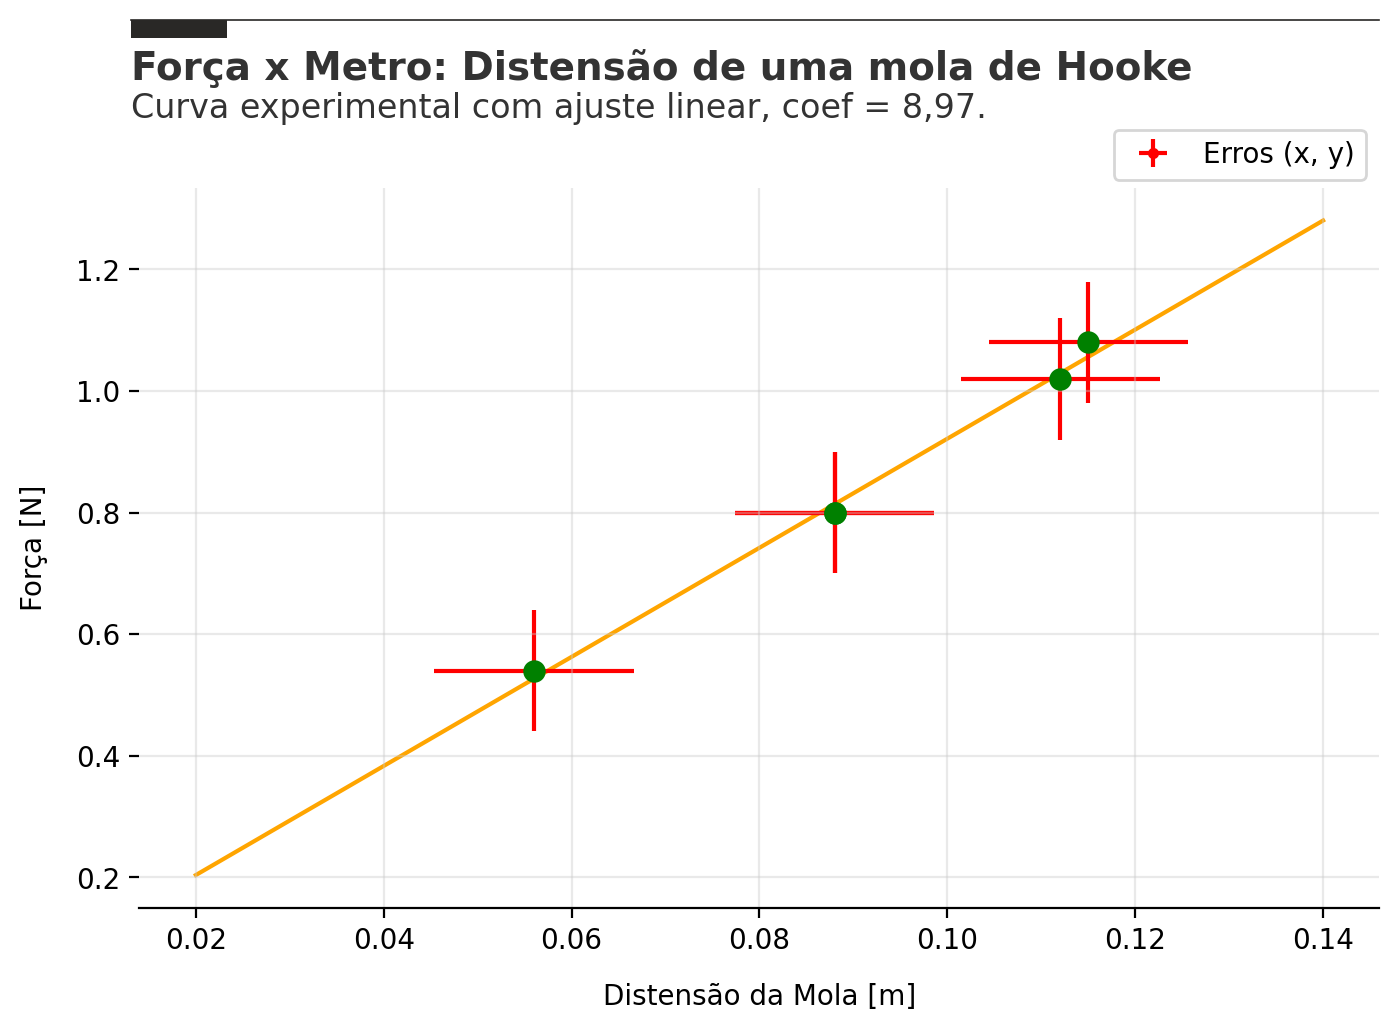

In [196]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x1, y1, df1["σm F"][0], df1["σm D"][0], fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x1, y1, s = 50, c = "green", zorder = 2)
ax.plot(xfit, yfit, c = "orange", zorder = 0)


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Força [N]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Distensão da Mola [m]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Força x Metro: Distensão de uma mola de Hooke", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Curva experimental com ajuste linear, coef = 8,97.", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_3/uma_mola.png")

## Gráfico para o experimento com duas molas em série

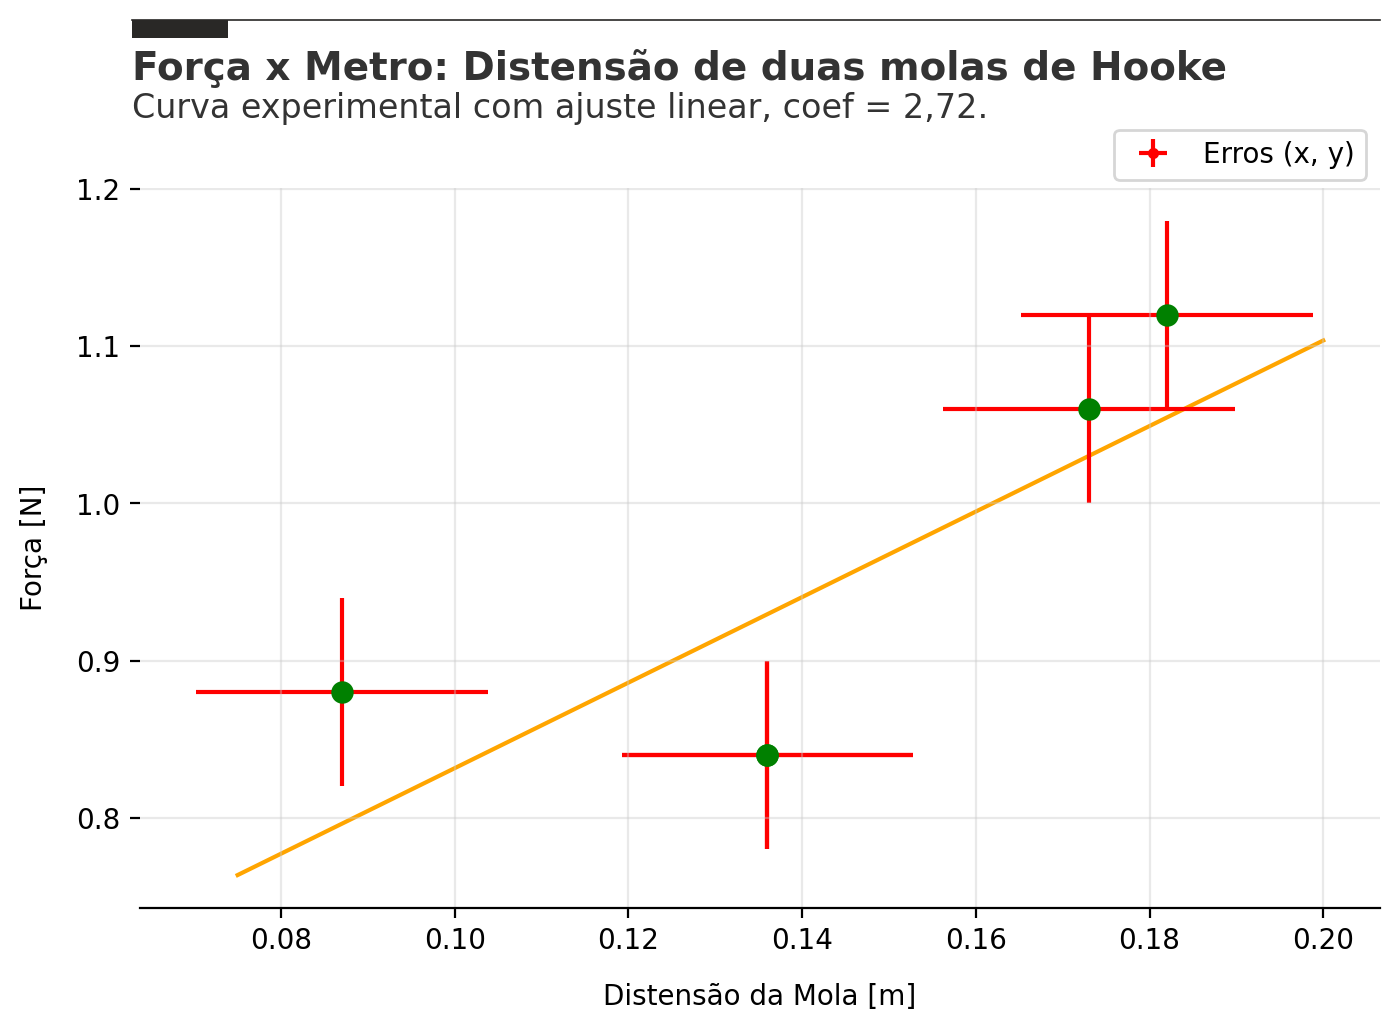

In [197]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x3, y3, df3["σm F"][0], df3["σm D"][0], fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x3, y3, s = 50, c = "green", zorder = 2)
ax.plot(xfit3, yfit3, c = "orange", zorder = 0)


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Força [N]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Distensão da Mola [m]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Força x Metro: Distensão de duas molas de Hooke", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Curva experimental com ajuste linear, coef = 2,72.", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_3/duas_molas.png")